In [1]:
import numpy as np
import matplotlib.pyplot as plt
from neural_net import NeuralNetwork
import cPickle, gzip

# Load the dataset
f = gzip.open('DATA/mnist.pkl.gz', 'rb')
train_set, valid_set, test_set = cPickle.load(f)
f.close()



%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))



In [2]:
X_train = np.array(train_set[0])
y_train = np.array(train_set[1])
X_val = np.array(valid_set[0])
y_val = np.array(valid_set[1])
X_test = np.array(test_set[0])
y_test = np.array(test_set[1])
print 'Train data shape: ', X_train.shape
print 'Train labels shape: ', y_train.shape
print 'Validation data shape: ', X_val.shape
print 'Validation labels shape: ', y_val.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape

Train data shape:  (50000, 784)
Train labels shape:  (50000,)
Validation data shape:  (10000, 784)
Validation labels shape:  (10000,)
Test data shape:  (10000, 784)
Test labels shape:  (10000,)


In [3]:
input_size = 28 * 28
hidden_size = 100
num_classes = 10
# initialize the network
net = NeuralNetwork(input_size, hidden_size, num_classes)

# train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=2000, batch_size=200,
            learning_rate=0.5,learning_rate_decay=0.95,
            reg=1e-4, verbose=True)

# predict on the validation set

val_acc = (net.predict(X_val) == y_val).mean()
print 'Validation accuracy: ', val_acc

iteration 0 / 2000: loss 2.302585
iteration 100 / 2000: loss 0.437859
iteration 200 / 2000: loss 0.335277
iteration 300 / 2000: loss 0.246358
iteration 400 / 2000: loss 0.307699
iteration 500 / 2000: loss 0.190048
iteration 600 / 2000: loss 0.237762
iteration 700 / 2000: loss 0.145719
iteration 800 / 2000: loss 0.188285
iteration 900 / 2000: loss 0.146569
iteration 1000 / 2000: loss 0.179875
iteration 1100 / 2000: loss 0.104637
iteration 1200 / 2000: loss 0.133331
iteration 1300 / 2000: loss 0.109333
iteration 1400 / 2000: loss 0.139830
iteration 1500 / 2000: loss 0.088196
iteration 1600 / 2000: loss 0.064949
iteration 1700 / 2000: loss 0.117629
iteration 1800 / 2000: loss 0.071039
iteration 1900 / 2000: loss 0.063642
Validation accuracy:  0.9715


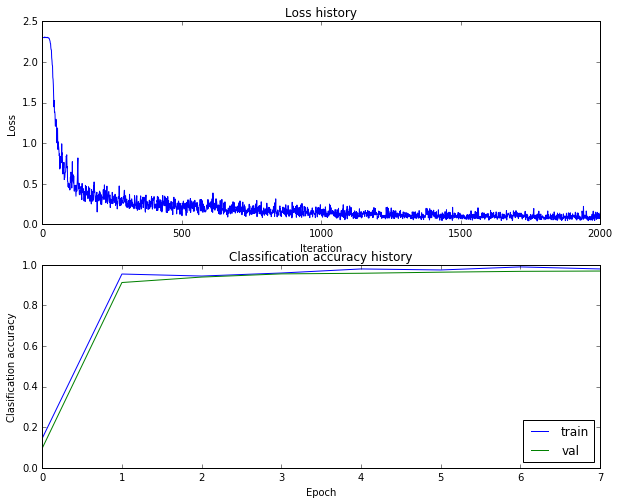

In [4]:
# Plot the loss function and train / validation accuracies
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.ylabel('Clasification accuracy')


plt.show()
fig.savefig('loss_class_acc.png')

In [5]:
test_acc = (net.predict(X_test) == y_test).mean()
print 'Test accuracy: ', test_acc

Test accuracy:  0.9701


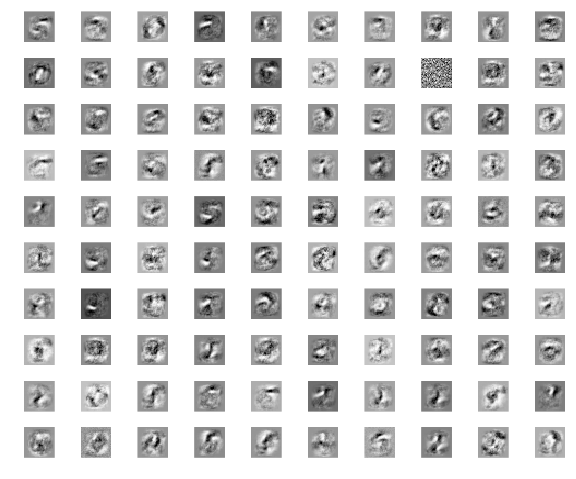

In [6]:
count = 1
for i in range(100):
    W1 = net.params['W1']
    imarray = np.asfarray(W1[:,i]).reshape((28,28))
    plt.subplot(10,10, count)
    plt.subplots_adjust(hspace=0.5)
    count += 1
    plt.imshow(imarray, cmap='Greys', interpolation='None')
    plt.gca().axis('off')
    

The network predicts that the image is a:  4
The actual label is:  6


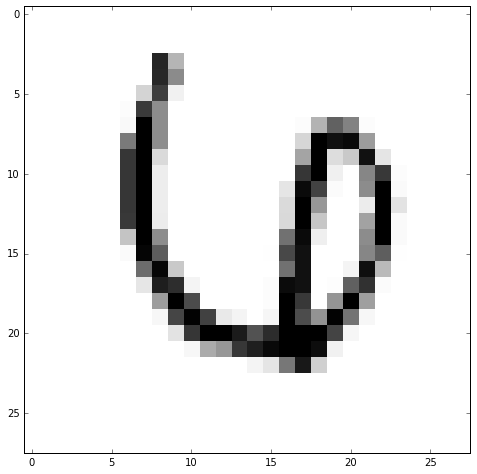

In [12]:
import matplotlib.cm as cm

train_x, train_y = train_set
test_x, test_y = test_set

rand_num = np.random.randint(1,10000)
rand_img = 255 - test_x[rand_num]

print 'The network predicts that the image is a: ', net.predict(test_x[rand_num])
print 'The actual label is: ', test_y[rand_num]

plt.imshow(rand_img.reshape((28, 28)), cmap=cm.Greys_r)
plt.show()


